<B>Data Visualization with Python and Data Viz Tools:  



<b> Introduction to Project 

In this project, I'll be exploring several data visualization tools used with Python including Dash, etc. I'll also be working with openpyxl to do extra and clean up the initial data that will be used in the plotting and statistical analysis.

I'll be working with 1 (or 2?) datasets and use them in to create some interesting visualizations of the data including presentation of the different variables in tables, charts, dynamic plots, etc using several dataviz tools such as: Dash, Great Table, Plotly

Interactive visualization tools from Prof Isken:
Dash, Bokeh, Panel, Holoviz, Streamlit and Voila

Some ideas of visualizations:
https://towardsdatascience.com/four-visualisation-libraries-that-seamlessly-integrate-with-pandas-dataframe-b0dd851966c2/

# Part 1: Pizza 

Let's start with some fun data that's included with Great Tables which is one of the packages I'll explore. In this first part, I'll work with a dataset provided by Great Table in its package of which provides a year of pizza sales from a pizza place: data.pizzaplace. One of my favorite foods is pizza and I've been able to enjoy some %%%% pies in my life. I installed the Great Tables package to work with in Part 1 and we saw some of those features already and it came with some interesting datasets. I'll use one of those  to test out some additional features of this package, along with etc....

## Preliminary Steps - Loading Packages

In [1]:
# To auto-reload modules in jupyter notebook (so that changes in files *.py doesn't require manual reloading):
# https://stackoverflow.com/questions/5364050/reloading-submodules-in-ipython
%load_ext autoreload
%autoreload 2

I installed these packages from the command line first: plotly, Great Tables.....

We covered these in my Python class, but for those following along, it's easy to install packages.
From any conda environment or using pip install, I typed these commands:

For Plotly:
```
$ conda install -c plotly plotly=5.14.1
```
And for Great Tables:

```
pip install great_tables
```

And for Dash:

Dash is the best way to build analytical apps in Python using Plotly figures. To run the app below, run pip install dash, click "Download" to get the code and run python app.py (https://plotly.com/python/getting-started/)

```
$ conda install jupyterlab anywidget
```
or notebooks:
```
conda install "notebook>=7.0" "anywidget>=0.9.13"
```
Info on Plotly here:
https://plotly.com/python/getting-started/

And Great Tables:
https://posit-dev.github.io/great-tables/reference/
and here:
https://github.com/posit-dev/great-tables

I also checked out the GitHub Discussions on Great Tables here: https://posit-dev.github.io/great-tables/articles/intro.html  along my journey to using the package and the pizza dataset later.


### Importing Libraries

Now we can import them along with our other commonly used libraries and magic command for inline plotting, etc.....

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from great_tables import GT


In [18]:
%matplotlib inline

## Data Reading and Prep

First we'll start with reading in the data again and determine what kind of cleaning we need to do to work with it.


The first dataset I'll explore is a cleaned up one and simple, so it's a good way to begin looking at the visualization tools before moving onto a more complicated one. 
I started with something easy - the GT class in Great Tables to lay out the variables 

In [19]:
# Here we'll import the pizza dataset

from great_tables.data import pizzaplace

### Topic pizza

Take a quick look at the first 10 rows in the dataset with default values and all variables



In [20]:
# Create a display table showing ten first records 

pizza_mini = pizzaplace.head(10)
gt_tbl = GT(pizza_mini)

# Show the output table
# If working in the console, use gt_tbl.show()
gt_tbl

id,date,time,name,size,type,price
2015-000001,2015-01-01,11:38:36,hawaiian,M,classic,13.25
2015-000002,2015-01-01,11:57:40,classic_dlx,M,classic,16.0
2015-000002,2015-01-01,11:57:40,mexicana,M,veggie,16.0
2015-000002,2015-01-01,11:57:40,thai_ckn,L,chicken,20.75
2015-000002,2015-01-01,11:57:40,five_cheese,L,veggie,18.5
2015-000002,2015-01-01,11:57:40,ital_supr,L,supreme,20.75
2015-000003,2015-01-01,12:12:28,prsc_argla,L,supreme,20.75
2015-000003,2015-01-01,12:12:28,ital_supr,M,supreme,16.5
2015-000004,2015-01-01,12:16:31,ital_supr,M,supreme,16.5
2015-000005,2015-01-01,12:21:30,ital_supr,M,supreme,16.5


Does Great tables (GT) provide information? No, it really only makes display tables. But you can modify and add columns, format the data, and ????? Let's remove the id, and format the date and time differently and change our price to currency.

### Formatting

We append each field we want to format with the column name and relevant formatting methods: fmt.currency, fmt.date etc

In [21]:
from great_tables import vals

# we can drop just include the fields we want by adding them to our next mini set
# Is there way to add 10 records at bottom????

gt_pizza2 = GT(pizza_mini[["date", "time", "type" ,"price"]].head(5))
gt_pizza2 = gt_pizza2.fmt_currency(columns="price").fmt_date(columns="date", date_style="m_day_year").fmt_time(columns="time", time_style="h_m_p")

gt_pizza2

date,time,type,price
"Jan 1, 2015",11:38 AM,classic,$13.25
"Jan 1, 2015",11:57 AM,classic,$16.00
"Jan 1, 2015",11:57 AM,veggie,$16.00
"Jan 1, 2015",11:57 AM,chicken,$20.75
"Jan 1, 2015",11:57 AM,veggie,$18.50


In [22]:
# Col Spanner
# Nanoplots - Line and bar plots

Now let's move the dataset into a dataframe so we can manipulate the data and create more interesting tables. GT supports both pandas and polars. Let's create a pandas dataframe.

### Moving our dataset to a Dataframe

We have several ways to move our data into a Dataframe. We can use the csv file that Great Tables provides and read in the data that way.

In [36]:
# Dataframe using Pandas

pizza_csv = '../../data/pizzaplace.csv'

df_pizza = pd.read_csv(pizza_csv)
# Getting first 3 rows from the DataFrame
df_pizza_mini = df_pizza.head(100)
print(df_pizza_mini)

             id        date      time          name size     type  price
0   2015-000001  2015-01-01  11:38:36      hawaiian    M  classic  13.25
1   2015-000002  2015-01-01  11:57:40   classic_dlx    M  classic  16.00
2   2015-000002  2015-01-01  11:57:40      mexicana    M   veggie  16.00
3   2015-000002  2015-01-01  11:57:40      thai_ckn    L  chicken  20.75
4   2015-000002  2015-01-01  11:57:40   five_cheese    L   veggie  18.50
..          ...         ...       ...           ...  ...      ...    ...
95  2015-000038  2015-01-01  17:03:00      hawaiian    S  classic  10.50
96  2015-000039  2015-01-01  17:07:23     ital_supr    L  supreme  20.75
97  2015-000040  2015-01-01  17:14:36    southw_ckn    S  chicken  12.75
98  2015-000040  2015-01-01  17:14:36   four_cheese    L   veggie  17.95
99  2015-000041  2015-01-01  17:15:20  green_garden    S   veggie  12.00

[100 rows x 7 columns]


In [24]:
# Change time to hour only - with am and pm - and date to month / year only



SyntaxError: invalid syntax (2197423751.py, line 3)

In [23]:
# Time series of entire data set.....



In [ ]:
# with Polars

df_polars = pl.from_pandas(p)
print(df_pandas(:10))

Great Tables works with pandas and polars. Polars is similar to pandas except does not use an index like pandas. Other blah blah

In [ ]:
# replace dataframe with pizza data

#df_pizza_mini = pd.DataFrame(
#    {   "example": ["Row " + str(x) for x in range(1, 5)],
#        "numbers": [
#        ],
#    }
#)

GT(df_pizza_mini).fmt_nanoplot(columns="price")

### EDA

First, let's use Seaborn which I've used with R and would like to test it with Python.

In [ ]:
categoricals = ['BusinessTravel', 'Department', 'EducationField',
                'Gender', 'JobRole', 'MaritalStatus', 
                'JobLevel', 'JobSatisfaction', 'OverTime', 'PerformanceRating',
                'RelationshipSatisfaction', 'StockOptionLevel', 
                'TrainingTimesLastYear', 'WorkLifeBalance']
fig, axs = plt.subplots(6, 3, sharey=True, figsize=(12,18))
for feature, ax in zip(categoricals, axs.flatten()):
    vc = train[feature].value_counts()
    ind = vc.index
    if ind.dtype == np.int64: ind = np.sort(ind)
    vc = vc.reindex(ind)
    vc_no = train[feature][train.Attrition == 0].value_counts().reindex(ind)
    vc_yes = train[feature][train.Attrition == 1].value_counts().reindex(ind)

    width = vc / vc.max() * 0.9
    ax.bar(range(len(vc)), vc_yes / vc, width=width, color='red')
    ax.bar(range(len(vc)), vc_no / vc, bottom=vc_yes / vc, width=width, color='cyan')

    rotation = 0 if ind.dtype == np.int64 else 45
    ax.set_xticks(range(len(vc)), vc.index, rotation=rotation)
    ax.set_ylabel('Attrition rate')
    ax.set_xlabel(feature)
axs.flatten()[-1].axis('off')
plt.show()

In [ ]:

from great_tables import GT, html
from great_tables.data import sza
import polars as pl
import polars.selectors as cs

sza_pivot = (
    pl.from_pandas(sza)
    .filter((pl.col("latitude") == "20") & (pl.col("tst") <= "1200"))
    .select(pl.col("*").exclude("latitude"))
    .drop_nulls()
    .pivot(values="sza", index="month", on="tst", sort_columns=True)
)

(
    GT(sza_pivot, rowname_col="month")
    .data_color(
        domain=[90, 0],
        palette=["rebeccapurple", "white", "orange"],
        na_color="white",
    )
    .tab_header(
        title="Solar Zenith Angles from 05:30 to 12:00",
        subtitle=html("Average monthly values at latitude of 20&deg;N."),
    )
    .sub_missing(missing_text="")
)



In [ ]:
(
    GT(random_numbers_df)
    .fmt_nanoplot(
        columns="numbers",
        plot_type="bar",
        autoscale=True,
        reference_line="min",
        reference_area=[0, "max"],
        options=nanoplot_options(
            data_bar_stroke_color="gray",
            data_bar_stroke_width=2,
            data_bar_fill_color="orange",
            data_bar_negative_stroke_color="blue",
            data_bar_negative_stroke_width=1,
            data_bar_negative_fill_color="lightblue",
            reference_line_color="pink",
            reference_area_fill_color="bisque",
            vertical_guide_stroke_color="blue",
        ),
    )
)

### Working with Plotly

Plotting the data

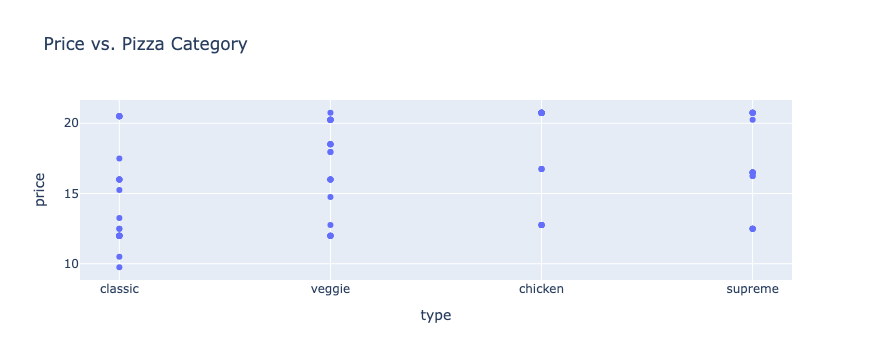

In [37]:
# Move this imprt of pacakages to top
import plotly.express as px
import plotly.graph_objects as go


fig = px.scatter(df_pizza_mini,
                x='type',
                y='price',
                hover_name='name',
                title='Price vs. Pizza Category')
fig.show()

/opt/anaconda3/envs/aap/lib/python3.12/site-packages/plotly/express/_core.py:1985: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



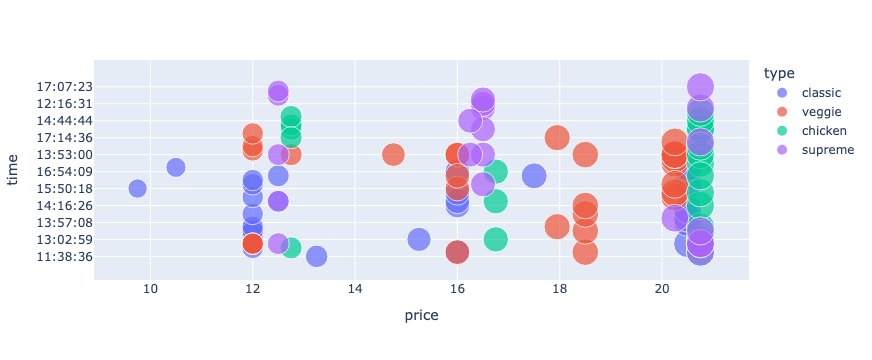

In [38]:
#df = px.data.iris()
fig = px.scatter(df_pizza_mini, x="price", y="time", color="type",
                 size='price', hover_data=['name'])
fig.show()

### Dash

READ UP ON DASH!!

# Part 2: Operating Expenses at Universities - Where Does the Money Go?

In this next part, I'll work with some Financial Datasets from a public university to see where Academic and Administrative units spend their budgets.

### Data Reading and Prep

The data set comes in 2 formats and I'll read in both - with slightly different information. The first is a large excel file of many financial records from a public university. The second is from the same univerisity with some different information saved to csv files. Let's start with the excel file.

Pseudocode: pull in excel files, dataframe? deal with empty feilds, convert numbers and texts as needed, delete cols

First step would be to read the CSV file into a pandas dataframe using the pandas read_csv() function. I can customize how to read it in with the various input arguments once I get a quick overview of the variables and the default values.

parse dates - convert to date time and then extract month: https://www.kaggle.com/code/alexisbcook/parsing-dates

In [28]:
# Read in the csv file with default values and all variables
ou1 = pd.read_csv('../../data/ou_expenses.csv')
ou1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21638 entries, 0 to 21637
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   FSYR_CODE                 21638 non-null  int64  
 1   FUND_CODE                 21638 non-null  int64  
 2   FUND_DESC                 21638 non-null  object 
 3   DivisionOrg               21638 non-null  int64  
 4   Diivision                 21638 non-null  object 
 5   UnitOrg                   21638 non-null  int64  
 6   Unit                      21638 non-null  object 
 7   ACCT_CODE                 21638 non-null  object 
 8   ACCT_DESC                 21638 non-null  object 
 9   PROG_CODE                 21638 non-null  int64  
 10  HEADER_RUCL_CODE          21638 non-null  object 
 11  FIELD_CODE_KEY            21638 non-null  object 
 12  ORGN_DESC                 21638 non-null  object 
 13  SumOfTRANSACTION_AMOUNT   21638 non-null  float64
 14  DEBIT_

In [29]:
# Some of the variables are self explanatory but let's take a peak at the first few records 
# to get an idea of what we might be able to visualize of interest

ou1.head()

,FSYR_CODE,FUND_CODE,FUND_DESC,DivisionOrg,Diivision,UnitOrg,Unit,ACCT_CODE,ACCT_DESC,PROG_CODE,HEADER_RUCL_CODE,FIELD_CODE_KEY,ORGN_DESC,SumOfTRANSACTION_AMOUNT,DEBIT_CREDIT_IND,TRANSACTION_DATE,TRANSACTION_DESC,DETAIL_DOCUMENT_CODE,DETAIL_SUM_POST_DOC_CODE,DETAIL_SEQ_NUMBER
0,2020,10006,Off Of Dean Cas,2154,Academic Affairs,20,Arts & Sciences,K003,Advertising-Press/Newspaper,2360,JE16,YTD,Arts & Sciences,475.0,+,28-Apr-20,PCARD 6824 BLUE LAKES FEST AD,JAC01476,4290833,2106
1,2020,10006,Off Of Dean Cas,2154,Academic Affairs,20,Arts & Sciences,K003,Advertising-Press/Newspaper,2360,JE16,YTD,Arts & Sciences,400.0,+,28-Apr-20,PCARD 6824 NATS CONF AD,JAC01476,4290833,2103
2,2020,10006,Off Of Dean Cas,2154,Academic Affairs,20,Arts & Sciences,K003,Advertising-Press/Newspaper,2360,JVBM,YTD,Arts & Sciences,-475.0,-,21-May-20,CD Mar Blue Lakes Fest Ad,J0230938,5211239,2
3,2020,10006,Off Of Dean Cas,2154,Academic Affairs,20,Arts & Sciences,K003,Advertising-Press/Newspaper,2360,JVBM,YTD,Arts & Sciences,-400.0,-,21-May-20,CD Mar NATS Conf Ad,J0230938,5211239,8
4,2020,10015,SVPAA-Uni & Comm Outreach,2154,Academic Affairs,2154,Academic Affairs,E069,Display Materials,2360,INNI,YTD,Academic Affairs,98.0,+,05-Aug-19,Laserpoint,I0537665,8051441,1


In [30]:
# Another way - using multiple csvs

file_name = '../../data/fin_trans_2024.csv'
# code here to bring in csv into one datadrame
# Clean data, drop columns, convert datatypes as needed

# Start with one csv file to look at the data
univ_exp24 = pd.read_csv(file_name)
univ_exp24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13819 entries, 0 to 13818
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FIELD_CODE_KEY              13819 non-null  object 
 1   POSTING_PERIOD              13819 non-null  int64  
 2   MONTH_ABBR                  13819 non-null  object 
 3   FISCAL_YEAR                 13819 non-null  int64  
 4   ACCOUNT                     13819 non-null  object 
 5   ACCOUNT_DESC                13819 non-null  object 
 6   ACCOUNT_POOL                13819 non-null  int64  
 7   ACCOUNT_POOL_DESC           13819 non-null  object 
 8   ACTUAL_ORGANIZATION_DESC_2  13819 non-null  object 
 9   ACTUAL_ORGANIZATION_DESC_3  12315 non-null  object 
 10  TOTAL_AMOUNT                13819 non-null  float64
dtypes: float64(1), int64(3), object(7)
memory usage: 1.2+ MB


Before we decide if we need to use any of read_csv features to change the data, let's look at the first few records.

In [31]:
univ_exp24.head()

,FIELD_CODE_KEY,POSTING_PERIOD,MONTH_ABBR,FISCAL_YEAR,ACCOUNT,ACCOUNT_DESC,ACCOUNT_POOL,ACCOUNT_POOL_DESC,ACTUAL_ORGANIZATION_DESC_2,ACTUAL_ORGANIZATION_DESC_3,TOTAL_AMOUNT
0,YTD,1,JUL,2024,K025,Fees-Membership/Admissions,7101,Supplies & Services Budget,Student Affairs & Diversity,Enrollment Management,2114.00
1,YTD,1,JUL,2024,K025,Fees-Membership/Admissions,7101,Supplies & Services Budget,Academic Affairs,School of Medicine,8668.00
2,YTD,1,JUL,2024,K025,Fees-Membership/Admissions,7101,Supplies & Services Budget,Academic Affairs,Graduate Education & Academic Admin,302.00
3,YTD,1,JUL,2024,X260,Tuition-Resident Grad-Summer,5206,Tuition & Fees External Budget,Finance & Administration,Assoc VP & Controller,2665502.60
4,YTD,1,JUL,2024,X013,Default Charges,5201,External Revenue Budget,Finance & Administration,Assoc VP & Controller,-19978.51


Some of the data won't be necessary for plotting or EDA, so let's clean our file in a 2nd version. We could do this in the dataframe conversion but I won't need that data at all in this data exploration so we can use the readcsv parametres. We can convert some of the field types, drop a few columns, rename some of our columns, and create a new month field and eliminate the granularity of the transaction date. And we won't need the index so let's move (remove????) it. 

In [32]:
univ_exp24_a = pd.read_csv(file_name, dtype={'FIELD_CODE_KEY': 'string', 'ACCOUNT_DESC': 'string', 
                                             'ACCOUNT_POOL_DESC': 'string',
                    'ACTUAL_ORGANIZATION_DESC_2':'string',
                    'ACTUAL_ORGANIZATION_DESC_3':'string'}, 
                  parse_dates=['MONTH_ABBR'], # month??
                  usecols=['FIELD_CODE_KEY', 'POSTING_PERIOD', 'MONTH_ABBR','FISCAL_YEAR', 
                           'ACCOUNT_DESC',
                           'ACCOUNT_POOL_DESC',
                           'ACTUAL_ORGANIZATION_DESC_2',
                          'ACTUAL_ORGANIZATION_DESC_3',
                          'TOTAL_AMOUNT'],
                  #names=['Type','Period','Month','Year','Category','Division','Department','Amount']
                          )
univ_exp24_a.info()                      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13819 entries, 0 to 13818
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FIELD_CODE_KEY              13819 non-null  string 
 1   POSTING_PERIOD              13819 non-null  int64  
 2   MONTH_ABBR                  13819 non-null  object 
 3   FISCAL_YEAR                 13819 non-null  int64  
 4   ACCOUNT_DESC                13819 non-null  string 
 5   ACCOUNT_POOL_DESC           13819 non-null  string 
 6   ACTUAL_ORGANIZATION_DESC_2  13819 non-null  string 
 7   ACTUAL_ORGANIZATION_DESC_3  12315 non-null  string 
 8   TOTAL_AMOUNT                13819 non-null  float64
dtypes: float64(1), int64(2), object(1), string(5)
memory usage: 971.8+ KB


/var/folders/vh/hgsw623d4rl9jx4951jph2240000gn/T/ipykernel_47962/2435467511.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [33]:
univ_exp24_a.head() 

,FIELD_CODE_KEY,POSTING_PERIOD,MONTH_ABBR,FISCAL_YEAR,ACCOUNT_DESC,ACCOUNT_POOL_DESC,ACTUAL_ORGANIZATION_DESC_2,ACTUAL_ORGANIZATION_DESC_3,TOTAL_AMOUNT
0,YTD,1,JUL,2024,Fees-Membership/Admissions,Supplies & Services Budget,Student Affairs & Diversity,Enrollment Management,2114.00
1,YTD,1,JUL,2024,Fees-Membership/Admissions,Supplies & Services Budget,Academic Affairs,School of Medicine,8668.00
2,YTD,1,JUL,2024,Fees-Membership/Admissions,Supplies & Services Budget,Academic Affairs,Graduate Education & Academic Admin,302.00
3,YTD,1,JUL,2024,Tuition-Resident Grad-Summer,Tuition & Fees External Budget,Finance & Administration,Assoc VP & Controller,2665502.60
4,YTD,1,JUL,2024,Default Charges,External Revenue Budget,Finance & Administration,Assoc VP & Controller,-19978.51


In [ ]:
# EDA using GT - table with monthly values on left, FY across top, avg spent on ?? Acct
# Make acct category interactive?

from great_tables import GT, html
from great_tables.data import sza
import polars as pl
import polars.selectors as cs

sza_pivot = (
    pl.from_pandas(sza)
    .filter((pl.col("latitude") == "20") & (pl.col("tst") <= "1200"))
    .select(pl.col("*").exclude("latitude"))
    .drop_nulls()
    .pivot(values="sza", index="month", on="tst", sort_columns=True)
)

(
    GT(sza_pivot, rowname_col="month")
    .data_color(
        domain=[90, 0],
        palette=["rebeccapurple", "white", "orange"],
        na_color="white",
    )
    .tab_header(
        title="Average $ Spent on xx Category by Month and Fiscal Year",
        subtitle=html("Average monthly values by Dept."),
    )
    .sub_missing(missing_text="")
)



### Working with Plotly

Plotting the data

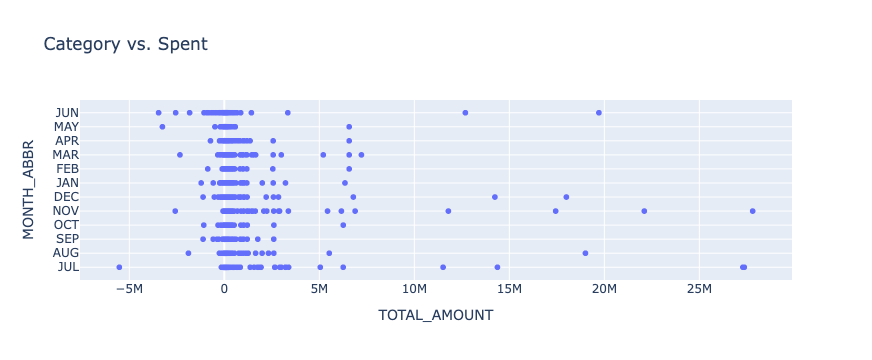

In [35]:
# Add Color for Unit??
fig = px.scatter(univ_exp24_a,
                x='TOTAL_AMOUNT',
                y='MONTH_ABBR',
                hover_name='ACTUAL_ORGANIZATION_DESC_2',
                title='Category vs. Spent')
fig.show()

### Advanced Excel with xlwings

I decided to look into xlwings to see if I could bring in my data directly from my Access database. This was complicated and involved .......

What is xlwings? It's a way to bring Excel, Python and pandas together by using the xlwings tool to bring your data straight from your external database - no need to generate your csv files and read it outside python. It does some high level data wrangling and manipulation and delivers the data to your audience in a spreadsheet format - here I'll use Excel. You can use Python to analyze your data in your database and then write your ouput to Excel.

Now that we know what the dataset looks like, let's do some analsis on the all of the data, and see if there are any trends.